In [2]:
import pandas as pd
import re
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv("/content/drive/MyDrive/Sentimental analasys/FinancialData.csv",encoding="ISO-8859-1")
data.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [5]:
data.shape

(4845, 2)

In [6]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

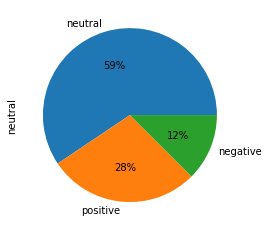

In [8]:
data.neutral.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [9]:
features = data.iloc[:,:-1].values
labels = data.iloc[:, 0].values

In [10]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    
    processed_feature= re.sub(r'\s+[a-zA-Z_0-9]\s+', ' ', processed_feature)


    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [11]:
processed_features[3]

' positive '

In [12]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [13]:
max(processed_features[3].tolist())

1.0

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [15]:
from sklearn.svm import SVC

text_classifier = SVC()
text_classifier.fit(X_train, y_train)

SVC()

In [16]:
predictions = text_classifier.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[117   0   0]
 [  0 596   0]
 [  0   0 256]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       117
     neutral       1.00      1.00      1.00       596
    positive       1.00      1.00      1.00       256

    accuracy                           1.00       969
   macro avg       1.00      1.00      1.00       969
weighted avg       1.00      1.00      1.00       969

1.0
